# Exercise 4.1 - single map plot (M. Hauser)
prepared by M.Hauser

In this exercise we will again use the growing season lenght (GSL), see [exercise 0.3](./ex0_3_netCDF4.ipynb).

The data is described in Donat et al., [2013](http://onlinelibrary.wiley.com/doi/10.1002/jgrd.50150/abstract), and was obtained from http://www.climdex.org/. 

We will create the following plot (see Mueller et al., ([2015](https://www.sciencedirect.com/science/article/pii/S2212094715000183))):
    

    

## Import modules

In [1]:
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import xarray as xr

import mplotutils as mpu
# import climada_wrappers as cw
# import gmt_binning
# import impact_statistics
import crop_config as co
import utils_plot_statistics as ups

%matplotlib inline
%load_ext autoreload
%autoreload 2

on_cluster: False


We will use `cartopy`to plot georeferenced data.

## Load data

In [2]:
"""
ggcm = co.ggcms[co.input_version][0] # gepic
crop = co.crop_types[-1] # whe
soc = co.soc
co2 = co.co2_fert
stat = co.statistics_list_mat[0] # ('count_rel_mean', -0.1)
gmt_bin = .5
fN = dict()
# TODO: adapt filenames to latest version
fN[0.5] = co.stats_dir / f'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{0.5:1.1f}.csv'
fN[1.5] = co.stats_dir / f'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{1.5:1.1f}.csv'
fN_rel = dict()
fN_rel[0.5] = co.stats_dir / f'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{0.5:1.1f}_ref_{0.5:1.1f}.csv'
fN_rel[1.5] = co.stats_dir / f'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{1.5:1.1f}_ref_{0.5:1.1f}.csv'

# print(fN[0.5])

ds = ups.load_mat_stat(fN[1.5], directory=None, coord_exp=None)
print(ds)

coord_exp = pd.read_csv(co.imp_mat_dir / 'coord_exp.csv', encoding="ISO-8859-1", header=0)
print(coord_exp.shape)
data_df = dict()
data_df[0.5] = pd.read_csv(fN[0.5], encoding="ISO-8859-1", header=None)
data_df[1.5] = pd.read_csv(fN[1.5], encoding="ISO-8859-1", header=None)

#ds = xr.open_dataset(fN)
#ds
data = np.array(data_df[1.5][0].values).reshape(len(coord_exp.lat.unique()), len(coord_exp.lon.unique()))
ds = xr.Dataset(
    {
        "frequency": (("lat", "lon"), data),
    },
    {"lat": coord_exp.lat.unique(), "lon": coord_exp.lon.unique()},
)
ds
"""

'\nggcm = co.ggcms[co.input_version][0] # gepic\ncrop = co.crop_types[-1] # whe\nsoc = co.soc\nco2 = co.co2_fert\nstat = co.statistics_list_mat[0] # (\'count_rel_mean\', -0.1)\ngmt_bin = .5\nfN = dict()\n# TODO: adapt filenames to latest version\nfN[0.5] = co.stats_dir / f\'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{0.5:1.1f}.csv\'\nfN[1.5] = co.stats_dir / f\'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{1.5:1.1f}.csv\'\nfN_rel = dict()\nfN_rel[0.5] = co.stats_dir / f\'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{0.5:1.1f}_ref_{0.5:1.1f}.csv\'\nfN_rel[1.5] = co.stats_dir / f\'stats_self_{ggcm}_{soc}_{co2}_{crop}_{stat}_bin_{1.5:1.1f}_ref_{0.5:1.1f}.csv\'\n\n#\xa0print(fN[0.5])\n\nds = ups.load_mat_stat(fN[1.5], directory=None, coord_exp=None)\nprint(ds)\n\ncoord_exp = pd.read_csv(co.imp_mat_dir / \'coord_exp.csv\', encoding="ISO-8859-1", header=0)\nprint(coord_exp.shape)\ndata_df = dict()\ndata_df[0.5] = pd.read_csv(fN[0.5], encoding="ISO-8859-1", header=None)\ndata_df[1.

## Map

### Single map try-out

* create a figure with one axes, choose a projection
* add coastlines
* plot the variable `ds.trend`
* add a colorbar below the axes

In [3]:
"""f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(5,5))
ax.coastlines()
h = ax.pcolormesh(ds.lon, ds.lat, ds.frequency)
mpu.colorbar(h, ax, orientation='horizontal')
ax.set_global()"""

"f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(5,5))\nax.coastlines()\nh = ax.pcolormesh(ds.lon, ds.lat, ds.frequency)\nmpu.colorbar(h, ax, orientation='horizontal')\nax.set_global()"

## maps: bin and reference

In [2]:
directory = Path('/Users/eberenzs/Documents/Projects/crop_analysis/data/ISIMIP2b/output/Stats/20201104_crop_full_04/')
coord_exp = pd.read_csv(co.imp_mat_dir / 'coord_exp.csv', encoding="ISO-8859-1", header=0)

crops = co.crop_types # ['whe'] # co.crop_types # ['whe']
#ggcms = ['gepic'] # co.ggcms[co.input_version]
ggcms = co.ggcms[co.input_version] + ['combi']
stats = [('count_rel_mean', -.2),
         0.025,
         'mean',
        ]# co.statistics_list_mat_ref
ds_dict = dict()
figsize = (8,8)
ref_bin = 0.5
gmt_bin = 2.0

inverse = False
var_name = {False: 'Exceed. Frequency',
            True: 'Return Period'}

plot_single_ggcm = False

for crop in crops:
    ds_dict[crop] = dict()
    for ggcm in ggcms:
        ds_dict[crop][ggcm] = dict()
        for stat in stats:
            ds_dict[crop][ggcm][stat] = \
                ups.load_mat_stat_combi(fn_str_end='.csv',
                                fn_str_start='stats',
                                ggcm=ggcm,
                                crop=crop,
                                soc=co.soc,
                                co2=co.co2_fert,
                                stat=stat,
                                gmt_bin=gmt_bin,
                                ref_bin=ref_bin,
                                directory=directory,
                                coord_exp=coord_exp)[0]
            if not plot_single_ggcm or (ds_dict[crop][ggcm][stat] is None):
                continue
            for combi in ds_dict[crop][ggcm][stat].keys():
                if ds_dict[crop][ggcm][stat][combi] is None: continue
                if "ref" in combi:
                    title=f'{var_name[inverse]}: {crop} {ggcm} {stat} {combi} {ref_bin:1.1f}-{ref_bin+.5:1.1f}K'
                else:
                    title=f'{var_name[inverse]}: {crop} {ggcm} {stat} {combi} {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                ups.plot_mat_stat_single_old(ds_dict[crop][ggcm][stat][combi], figsize=figsize, title=title, inverse=inverse)
                if "bin_self" in combi:
                    title=f'{var_name[inverse]}: {crop} {ggcm} {stat} delta {combi}-ref_self {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                    ups.plot_mat_stat_single_old(ds_dict[crop][ggcm][stat][combi]-ds_dict[crop][ggcm][stat]['ref_self'], figsize=figsize, title=title, inverse=inverse)
                elif "bin_rel" in combi:
                    title=f'{var_name[inverse]}: {crop} {ggcm} {stat} delta {combi}-ref_rel {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                    ups.plot_mat_stat_single_old(ds_dict[crop][ggcm][stat][combi]-ds_dict[crop][ggcm][stat]['ref_rel'], figsize=figsize, title=title, inverse=inverse)                  


In [12]:
#print(ds_dict['whe']['gepic']['mean'])
print(ds_dict[crop]['pepic']['mean']['ref_rel'])
print(not [1])
print(ds_dict[crop][ggcms[0]][stat].keys())

None
False
dict_keys(['ref_self', 'bin_self', 'ref_rel', 'bin_rel'])


whe - mean - mean - ref_self


/Users/eberenzs/opt/anaconda3/envs/pyvis/lib/python3.6/site-packages/ipykernel_launcher.py:133: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


whe - mean - mean - bin_self
whe - mean - ('count_rel_mean', -0.2) - ref_self
whe - mean - ('count_rel_mean', -0.2) - bin_self
whe - mean - ('count_rel_mean', -0.2) - ref_rel
whe - mean - ('count_rel_mean', -0.2) - bin_rel
mai - mean - mean - ref_self
mai - mean - mean - bin_self
mai - mean - ('count_rel_mean', -0.2) - ref_self
mai - mean - ('count_rel_mean', -0.2) - bin_self
mai - mean - ('count_rel_mean', -0.2) - ref_rel
mai - mean - ('count_rel_mean', -0.2) - bin_rel


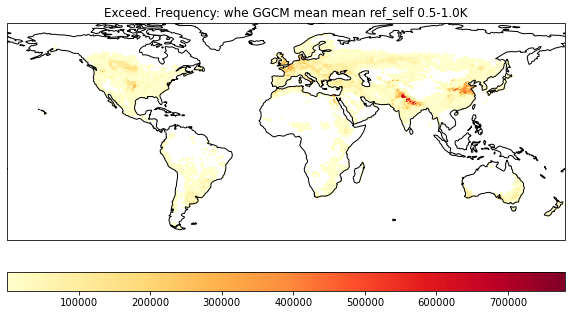

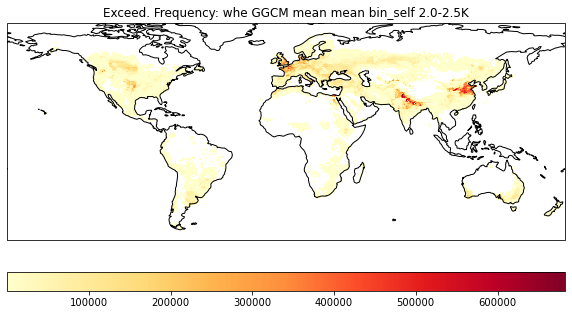

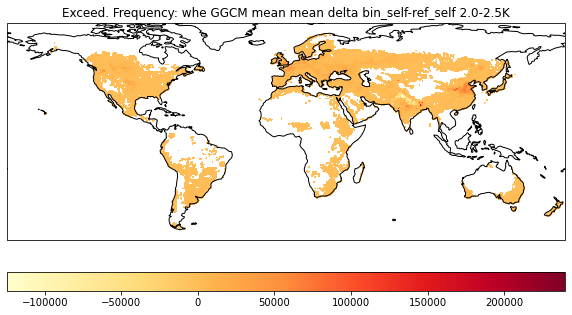

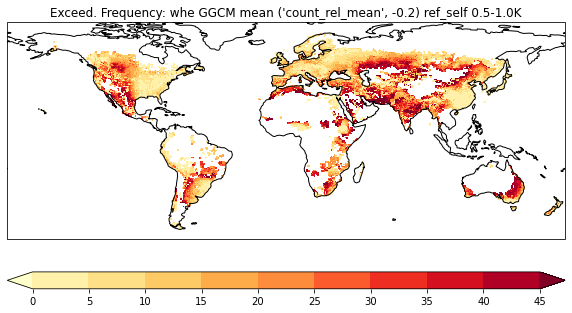

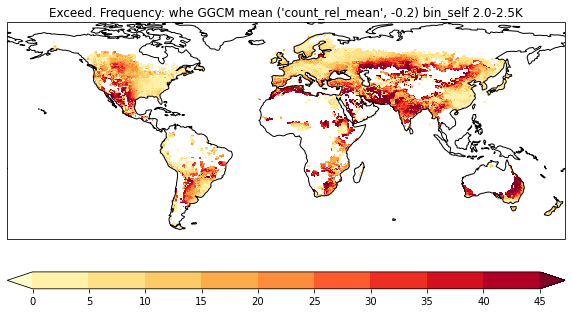

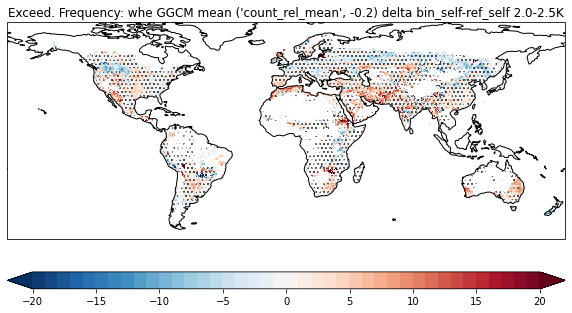

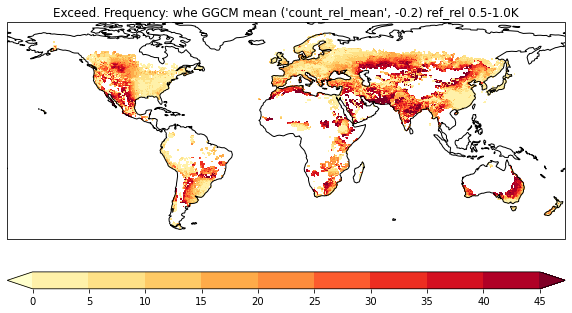

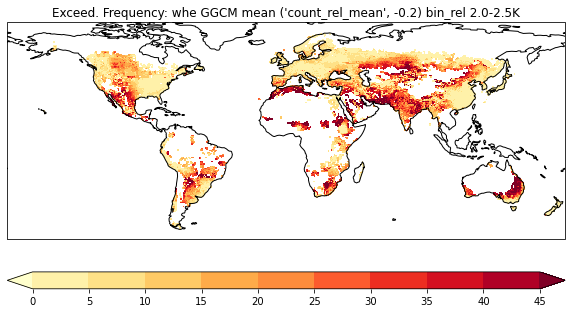

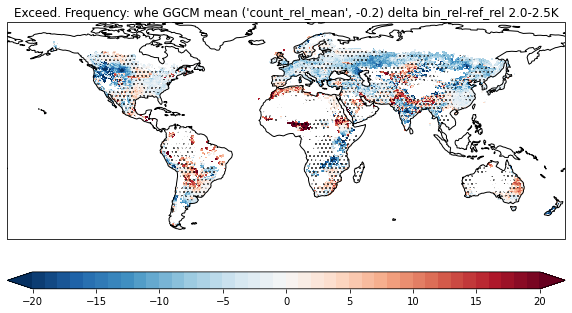

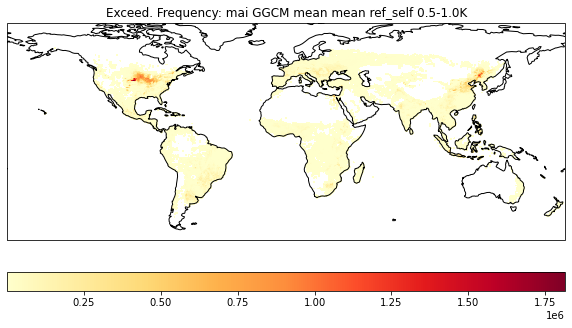

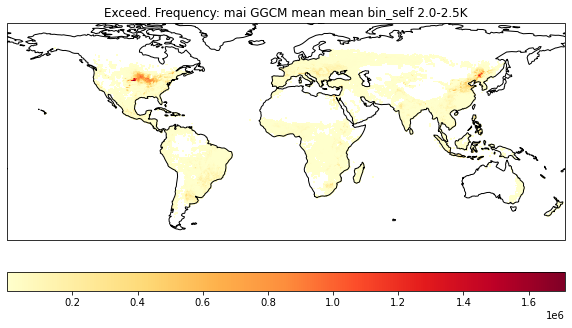

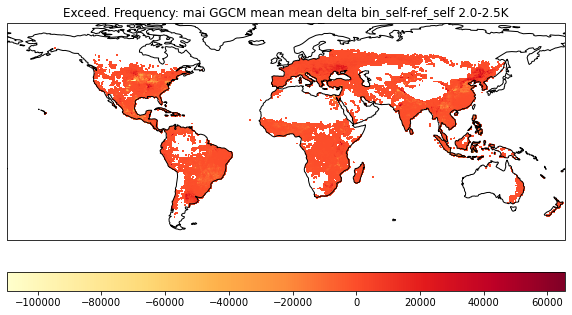

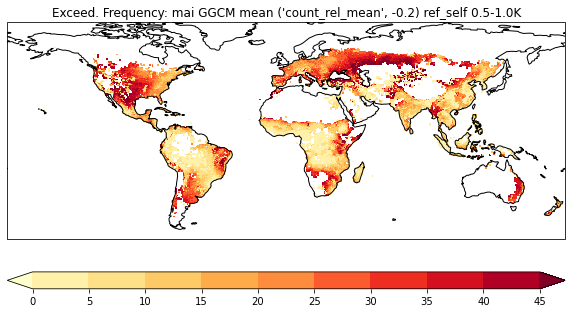

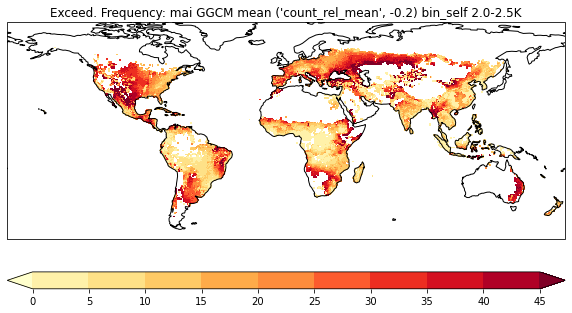

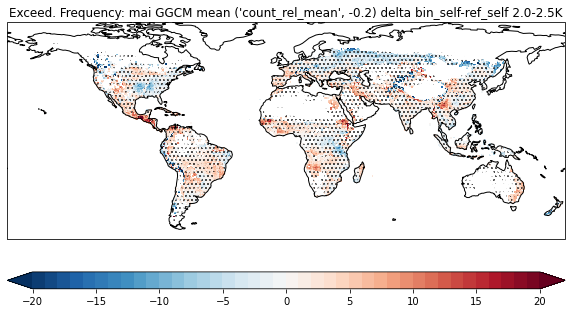

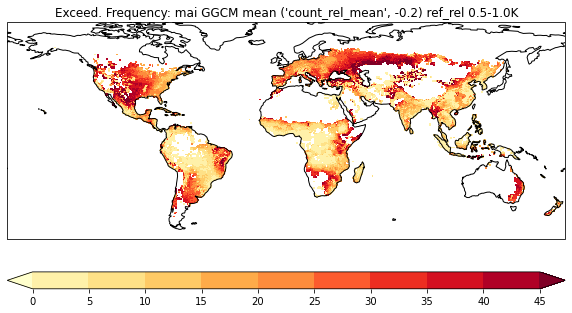

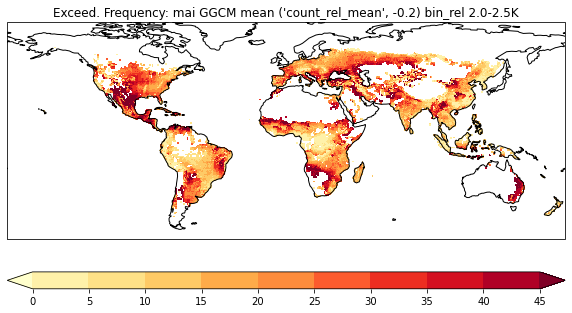

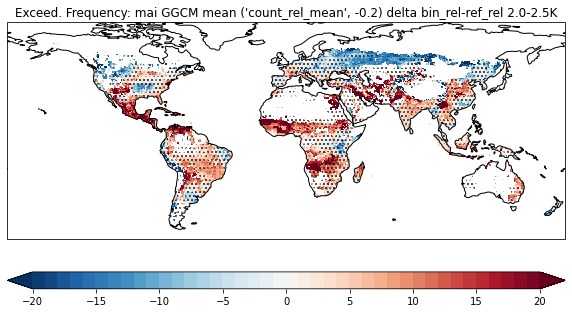

In [16]:
import utils_plot_statistics as ups
%reload_ext autoreload

# aggregation over GGCMs per crop and statistic:
figsize = (10,6)
crops = ['whe', 'mai'] # co.crop_types # ['whe']
ggcms = co.ggcms[co.input_version]
aggregation_stats = ['mean'] #,'min', 'max'] # ['median', 'mean', 'min', 'max']
stats = ['mean',
         ('count_rel_mean', -.2),
        ]
inverse = False
mask_low_mean = True
levels_dict = {'count_rel': {
    'default': np.arange(0, .5, .05),
    'default_p': 100*np.arange(0, .5, .05),
    'default_div': np.arange(-.2, .21, .01),
    'default_div_p': 100*np.arange(-.2, .21, .01),
    'inverse': np.arange(0, 100, 5),
    'inverse_div': np.arange(-25, 26, 2),
    'factor_log10': 10**np.arange(-1., 1.05, .1), # np.arange(-10, 10, 1),
    'rel_change': np.arange(-1, 100, 5),
    'rel_change_p': np.arange(0, 100, 5),
    'abs': None,
    'abs_80': 'abs_80',
    },
               'abs': {
    'default': None,
    'default_div': None,
    'inverse': None,
    'inverse_div': None,
    'factor_log10': np.arange(-10, 10, 1),
    'abs': None,
    }
              }
# compute combined stats:
for crop in crops:
    for agg_stat in aggregation_stats:
        ds_dict[crop][agg_stat] = dict()
        ds_dict[crop]['sign_consistent'] = dict()
        for stat in stats:
            ds_dict[crop][agg_stat][stat] = dict()
            ds_dict[crop]['sign_consistent'][stat] = dict()
            for combi in ds_dict[crop][ggcms[0]][stat].keys():                      
                # use xarray concat or vstack to stack along new dimension, then apply statistics
                objs = [ds_dict[crop][ggcm][stat][combi] for ggcm in ggcms if ds_dict[crop][ggcm][stat][combi] is not None]
                if not objs: continue
                ds_dict[crop][agg_stat][stat][combi] = ups.xr_concat_stat(objs, agg_stat+'_all_ggcms', agg_stat=agg_stat)
                objs_minus = None
                if combi=='bin_self':
                    objs_minus = [ds_dict[crop][ggcm][stat][combi]-ds_dict[crop][ggcm][stat]['ref_self'] for ggcm in ggcms if ds_dict[crop][ggcm][stat]['ref_self'] is not None]
                elif combi=='bin_rel':
                    objs_minus = [ds_dict[crop][ggcm][stat][combi]-ds_dict[crop][ggcm][stat]['ref_rel'] for ggcm in ggcms if ds_dict[crop][ggcm][stat]['ref_rel'] is not None]
                if not (objs_minus is None):
                    ds_dict[crop]['sign_consistent'][stat][combi] = ups.xr_concat_stat(objs_minus, 'sign_consistent', agg_stat='sign_consistent')
                if mask_low_mean:
                    ds_dict[crop][agg_stat][stat][combi] = ds_dict[crop][agg_stat][stat][combi].where(
                        ds_dict[crop]['mean']['mean']['ref_self'] > 0.0001 * ds_dict[crop]['mean']['mean']['ref_self'].max().statistic.values)
                    

# map plots for first aggregation statistic:
for crop in crops:
    for agg_stat in aggregation_stats:
        if len(ggcms)==1:
            agg_stat_str = ggcms[0]
        else:
            agg_stat_str = agg_stat
        for stat in stats:
            for combi in ds_dict[crop][ggcms[0]][stat].keys():  
                objs = [ds_dict[crop][ggcm][stat][combi] for ggcm in ggcms if ds_dict[crop][ggcm][stat][combi] is not None]
                if not objs: continue
                print(f'{crop} - {agg_stat_str} - {stat} - {combi}')
                # plot map aggregated to crop/stat level, 1 map per aggreg. stat.
                # then, combine per crop via stippling (different variations)
                # plot_mat_stat_single(ds, figsize=(10,10), title=None, levels=None, diverging=False, cmap=None, inverse=False, replace_zeros=False):
                if isinstance(stat, tuple) or '_rel' in combi:
                    levels=levels_dict['count_rel']
                else:
                    levels=levels_dict['abs']
                    # continue # TODO: skip absolute for now
                if "ref" in combi:
                    title=f'{var_name[False]}: {crop} GGCM {agg_stat_str} {stat} {combi} {ref_bin:1.1f}-{ref_bin+.5:1.1f}K'
                else:
                    title=f'{var_name[False]}: {crop} GGCM {agg_stat_str} {stat} {combi} {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                if isinstance(stat, tuple) or '_rel' in combi:
                    ups.plot_mat_stat_single(100*ds_dict[crop][agg_stat][stat][combi],
                                         figsize=figsize, title=title, levels=levels['default_p'], diverging=False, inverse=False)
                else:
                    ups.plot_mat_stat_single_old(ds_dict[crop][agg_stat][stat][combi],
                                         figsize=figsize, title=title, inverse=False)
                if inverse:
                    if "ref" in combi:
                        title=f'{var_name[True]}: {crop} GGCM {agg_stat_str} {stat} {combi} {ref_bin:1.1f}-{ref_bin+.5:1.1f}K'
                    else:
                        title=f'{var_name[True]}: {crop} GGCM {agg_stat_str} {stat} {combi} {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                    if isinstance(stat, tuple) or '_rel' in combi:
                        ups.plot_mat_stat_single(ds_dict[crop][agg_stat][stat][combi],
                                             figsize=figsize, title=title, levels=levels['inverse'], diverging=False, inverse=True)
                    else:
                        ups.plot_mat_stat_single_old(ds_dict[crop][agg_stat][stat][combi],
                                             figsize=figsize, title=title, inverse=True)
                if "bin_self" in combi:
                    title=f'{var_name[False]}: {crop} GGCM {agg_stat_str} {stat} delta {combi}-ref_self {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                    if isinstance(stat, tuple) or '_rel' in combi:

                        ups.plot_mat_stat_single(100*(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_self']),
                                                 figsize=figsize, title=title, levels=levels['default_div_p'], diverging=True, inverse=False, log=False,
                                                 stipple=ds_dict[crop]['sign_consistent'][stat][combi])
                    else:
                        ups.plot_mat_stat_single_old(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_self'],
                                                 figsize=figsize, title=title, inverse=False)    
                    if inverse:
                        title=f'{var_name[True]}: {crop} GGCM {agg_stat_str} {stat} delta {combi}-ref_self {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                        ups.plot_mat_stat_single(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_self'],
                                             figsize=figsize, title=title, levels=levels['inverse_div'], diverging=True, inverse=True)
                elif "bin_rel" in combi:
                    title=f'{var_name[False]}: {crop} GGCM {agg_stat_str} {stat} delta {combi}-ref_rel {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                    if isinstance(stat, tuple) or '_rel' in combi:
                        ups.plot_mat_stat_single(100*(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_rel']),
                                                 figsize=figsize, title=title, levels=levels['default_div_p'], diverging=True, inverse=False, log=False,
                                                 stipple=ds_dict[crop]['sign_consistent'][stat][combi])
                    else:
                        ups.plot_mat_stat_single_old(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_rel'],
                                                 figsize=figsize, title=title, inverse=False) 
                    if inverse:
                        title=f'{var_name[True]}: {crop} GGCM {agg_stat_str} {stat} delta {combi}-ref_rel {gmt_bin:1.1f}-{gmt_bin+.5:1.1f}K'
                        ups.plot_mat_stat_single(ds_dict[crop][agg_stat][stat][combi]-ds_dict[crop][agg_stat][stat]['ref_rel'],
                                                 figsize=figsize, title=title, levels=levels['inverse_div'], diverging=True, inverse=True)
                plt.savefig(co.res_dir / 'maps' / f'{title}.png', \
                             dpi=300, facecolor='w', edgecolor='w', \
                             orientation='portrait', papertype=None, format='png', \
                             transparent=False, bbox_inches=None, pad_inches=0.1, \
                             frameon=None, metadata=None)



In [14]:
a = xr.DataArray(np.arange(25).reshape(5, 5), dims=("x", "y"))
"""print(a)
b = a.where(a.x + a.y < 4)
print(b)
print(b.fillna(0))
print(b.fillna(0) + b.fillna(0))
print(a+b)
print('MAX:')
print(np.arange(a.min(), a.max(), np.int((a.max()-a.min())/5)))
print(np.int((a.max()-a.min())/10))"""

a[1,1] = -10
a[1,2] = -5
print(a)

max_ = np.max([np.abs(np.min(a.values)), np.abs(np.max(a.values))])
print(np.arange(-max_, max_, np.int((max_+max_)/5)))
print(np.int((a.max()-a.min())/10))

np.arange(-2, 2.1, .1).max()
print(a*100)

b = - xr.DataArray(np.arange(25).reshape(5, 5), dims=("x", "y"))
print(b)
print(np.sign(a*b))

print(ups.xr_concat_stat([a, b], 'testdim', agg_stat='sign_consistent'))
# print(ds_dict[crop]['sign_consistent'][stat][combi].min())
print(a.where(b>-11))
print(ds_dict[crop]['mean'][stat]['ref_self'].max().statistic.values)

<xarray.DataArray (x: 5, y: 5)>
array([[  0,   1,   2,   3,   4],
       [  5, -10,  -5,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])
Dimensions without coordinates: x, y
[-24 -15  -6   3  12  21]
3
<xarray.DataArray (x: 5, y: 5)>
array([[    0,   100,   200,   300,   400],
       [  500, -1000,  -500,   800,   900],
       [ 1000,  1100,  1200,  1300,  1400],
       [ 1500,  1600,  1700,  1800,  1900],
       [ 2000,  2100,  2200,  2300,  2400]])
Dimensions without coordinates: x, y
<xarray.DataArray (x: 5, y: 5)>
array([[  0,  -1,  -2,  -3,  -4],
       [ -5,  -6,  -7,  -8,  -9],
       [-10, -11, -12, -13, -14],
       [-15, -16, -17, -18, -19],
       [-20, -21, -22, -23, -24]])
Dimensions without coordinates: x, y
<xarray.DataArray (x: 5, y: 5)>
array([[ 0, -1, -1, -1, -1],
       [-1,  1,  1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])
Dimensions without coord

In [29]:
print(ds_dict[crop][agg_stat][stat])
print(ds_dict[crop][ggcms[0]][stat].keys())


{'ref_self': <xarray.Dataset>
Dimensions:    (lat: 340, lon: 720)
Coordinates:
  * lat        (lat) float64 84.75 84.25 83.75 83.25 ... -83.75 -84.25 -84.75
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables:
    statistic  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    inverse    (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan, 'bin_self': <xarray.Dataset>
Dimensions:    (lat: 340, lon: 720)
Coordinates:
  * lat        (lat) float64 84.75 84.25 83.75 83.25 ... -83.75 -84.25 -84.75
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables:
    statistic  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    inverse    (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan}
dict_keys(['ref_self', 'bin_self', 'ref_rel', 'bin_rel'])


### Exercise
 * restrict the displayed range of the data to -0.35, 0.35
 * choose a [diverging colormap](http://colorbrewer2.org)
 * if you haven't done so use `mpu.infer_interval_breaks`

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

h = ax.pcolormesh(ds.lon, ds.lat, ds.trend)

mpu.colorbar(h, ax, orientation='horizontal')

ax.set_global()

### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)

h = ax.pcolormesh(LON, LAT, ds.trend, cmap='RdBu_r', vmin=-0.35, vmax=0.35)

mpu.colorbar(h, ax, orientation='horizontal')

ax.set_global()

### Exercise

* use `aspect` to decrease the height of the colorbar
* use `mpu.from_levels_and_cmap` to get colors in steps of 0.1
* get rid of Antarctica (`ax.set_extent`)

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)

h = ax.pcolormesh(LON, LAT, ds.trend, cmap='RdBu_r', vmin=-0.35, vmax=0.35)

mpu.colorbar(h, ax, orientation='horizontal')

ax.set_global()

### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')

LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)

h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)



mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())



## Stippling

### Exercise
* develop the stippling for p values < 0.05 (the data is in `ds.p_val`, see [Exercise 3.5](./../Part3/ex3_5_stippling.ipynb)).
* use `mpu.cyclic_dataarray`.

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()





### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
h = ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

plt.colorbar(h)

### Exercise

* copy the relevant code to the other figure


In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

# ADD HERE

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())


## Region Boxes

### Exercise

* add the outline of the US-region (the coordinates are given below)
* add `US` as text label. If you set `va='top', ha='left'`, then lat: 82° N , lon: 198° E is a good position
* color the background of the textbox white (`bbox=dict(...)`)
  * if you set `pad=0` the background will only have the size of the text

In [ ]:
US_lon = [-165, -25, -25, -165, -165]
US_lat = [40, 40, 85, 85, 40]

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

# =======
# add regions


### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

ax.plot(US_lon, US_lat, transform=ccrs.PlateCarree(), color='k', lw=2)
ax.text(198, 82, 'US', va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
        bbox=dict(color='w', pad=0))






## Add other regions

### Exercise
 * add the outline & label for the European region (EU) and Asian region (AS)
 * either just copy the code from the US, or write a function 
 * do the text labels at -17 °E and 63°E

In [ ]:
EU_lon = [-20, 55, 55, -20, -20]
EU_lat = [40, 40, 85, 85, 40]
AS_lon = [60, 179, 179, 60, 60]
AS_lat = [40, 40, 85, 85, 40]

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

ax.plot(US_lon, US_lat, transform=ccrs.PlateCarree(), color='k', lw=2)
ax.text(198, 82, 'US', va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
        bbox=dict(color='w', pad=0))

### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)    

## Tropics

### Exercise

 * Use `ax.fill_between` to shade the tropics (25°S to 25°N) in a light grey
 * Set `zorder` to plot it behind the data

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics


### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics

ax.fill_between([-180, 180], [-25, -25], [25, 25], transform=ccrs.PlateCarree(),
                facecolor='0.75', edgecolor='none', zorder=0)

## Dont mark tropics over land

Now some regions in Africa, South America, ... are grey as well. 

### Exercise
 * use `ax.add_feature` and `cfeature.LAND` to color the land areas in white.
 * Play with `zorder`, so that the white land is between the data and the grey band around the tropics

In [ ]:

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics

ax.fill_between([-180, 180], [-25, -25], [25, 25], transform=ccrs.PlateCarree(),
                facecolor='0.75', edgecolor='none', zorder=0)

# color land areas in white


### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics

ax.fill_between([-180, 180], [-25, -25], [25, 25], transform=ccrs.PlateCarree(),
                facecolor='0.75', edgecolor='none', zorder=0)

# color land areas in white
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='none', lw=0, zorder=0.5)

## Tick labels

### Exercise
* add lon ticks every 60° and lat ticks every 25° (see [Exercise 3.6](./../Part3/ex3_6_ticks_grids.ipynb))
* you will have to adapt `pad` in for the colorbar
* use `ax.tick_params(axis='both', which='major', ...)` to
  * adjust the fontsize
  * set the tick length to 0




In [ ]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
h = ax.pcolormesh(LON, LAT, ds.trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics

ax.fill_between([-180, 180], [-25, -25], [25, 25], transform=ccrs.PlateCarree(),
                facecolor='0.75', edgecolor='none', zorder=0)

# color land areas in white
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='none', lw=0, zorder=0.5)

# =======
# set ticks


## Final Plot

### Solution

In [ ]:
f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

# =======
# plot trend

levels = np.arange(-0.35, 0.36, 0.1)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
LON, LAT = mpu.infer_interval_breaks(ds.lon, ds.lat, clip=True)
trend = np.ma.masked_invalid(ds.trend)
h = ax.pcolormesh(LON, LAT, trend, cmap=cmap, norm=norm)

# =======
# stippling

pval = mpu.cyclic_dataarray(ds.p_val)
levels = [0, 0.05, 1]
ax.contourf(pval.lon, pval.lat, pval, levels=levels, hatches=['...', ''], colors='none')

# =======
# add colorbar

mpu.colorbar(h, ax, orientation='horizontal', aspect=30)

# =======
# format axes

ax.set_extent([-180, 180, -63, 90], ccrs.PlateCarree())

# =======
# add regions

def mark_region(lon, lat, lbl, lon_lbl):
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='k', lw=2)
    ax.text(lon_lbl, 82, lbl, va='top', ha='left', fontweight='bold', transform=ccrs.PlateCarree(),
            bbox=dict(color='w', pad=0))
    
mark_region(US_lon, US_lat, 'US', 198)
mark_region(EU_lon, EU_lat, 'EU', -17)    
mark_region(AS_lon, AS_lat, 'AS', 63)  

# =======
# mark tropics

ax.fill_between([-180, 180], [-25, -25], [25, 25], transform=ccrs.PlateCarree(),
                facecolor='0.75', edgecolor='none', zorder=0)

# color land areas in white
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='none', lw=0, zorder=0.5)

# =======
# set ticks
lon = np.arange(-180, 181, 60)
lat = np.arange(-50, 76, 25)

# set the ticks
ax.set_xticks(lon, crs=ccrs.PlateCarree());
ax.set_yticks(lat, crs=ccrs.PlateCarree());

# format the ticks as e.g 60°W
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

ax.tick_params(axis='both', which='major', labelsize=8, length=0)